In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import torch


c:\Users\Galhom\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [5]:
# Unpickle the results for vgg16 and alexnet
RESULTS_DIR = os.path.join(os.getcwd(), 'results')
with open(os.path.join(RESULTS_DIR, 'training_results_alexnet.pkl'), 'rb') as f:
    alexnet_results = pickle.load(f)

with open(os.path.join(RESULTS_DIR, 'training_results_vgg16.pkl'), 'rb') as f:
    vgg16_results = pickle.load(f)

In [6]:
alexnet_train_loss = alexnet_results['loss']
alexnet_train_acc = alexnet_results['accuracy']
alexnet_epoch_time = alexnet_results['epoch_time']

vgg_train_loss = vgg16_results['loss']
vgg_train_acc = vgg16_results['accuracy']
vgg_epoch_time = vgg16_results['epoch_time']


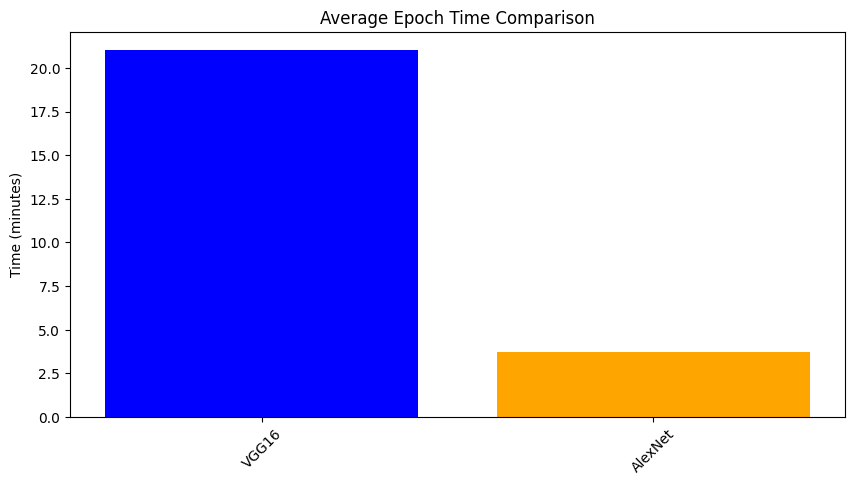

In [7]:
vgg_epoch_time = np.array(vgg_epoch_time) / 60  # Convert to minutes
alexnet_epoch_time = np.array(alexnet_epoch_time) / 60  # Convert to minutes
# take the mean of the epoch time for each model
vgg_epoch_time_mean = np.mean(vgg_epoch_time)
alexnet_epoch_time_mean = np.mean(alexnet_epoch_time)

#Plot a comparison of epoch time for both models
plt.figure(figsize=(10, 5))
plt.bar(['VGG16', 'AlexNet'], [vgg_epoch_time_mean, alexnet_epoch_time_mean], color=['blue', 'orange'])
plt.title('Average Epoch Time Comparison')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=45)
plt.savefig(os.path.join(RESULTS_DIR, 'epoch_time_comparison.png'), bbox_inches='tight')


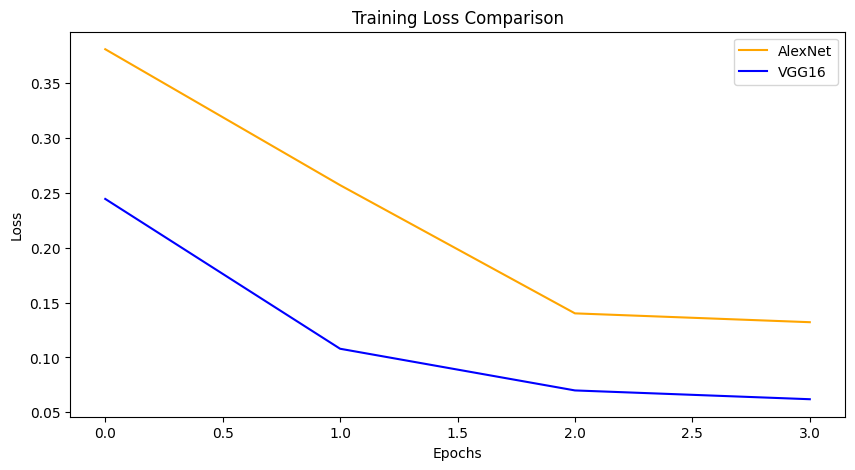

In [8]:
#Plot a comparison of training loss for both models
plt.figure(figsize=(10, 5))
plt.plot(alexnet_train_loss, label='AlexNet', color='orange')
plt.plot(vgg_train_loss, label='VGG16', color='blue')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(RESULTS_DIR, 'training_loss_comparison.png'), bbox_inches='tight')


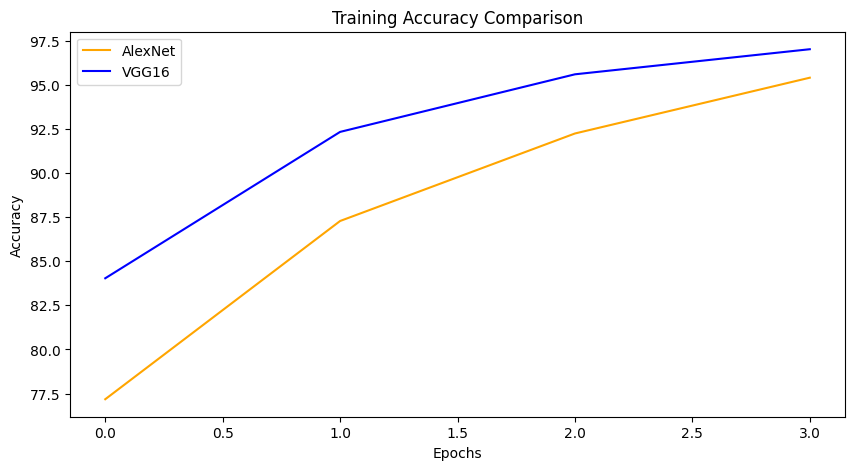

In [9]:
# Plot a comparison of training accuracy for both models
plt.figure(figsize=(10, 5))
plt.plot(alexnet_train_acc, label='AlexNet', color='orange')
plt.plot(vgg_train_acc, label='VGG16', color='blue')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(os.path.join(RESULTS_DIR, 'training_accuracy_comparison.png'), bbox_inches='tight')


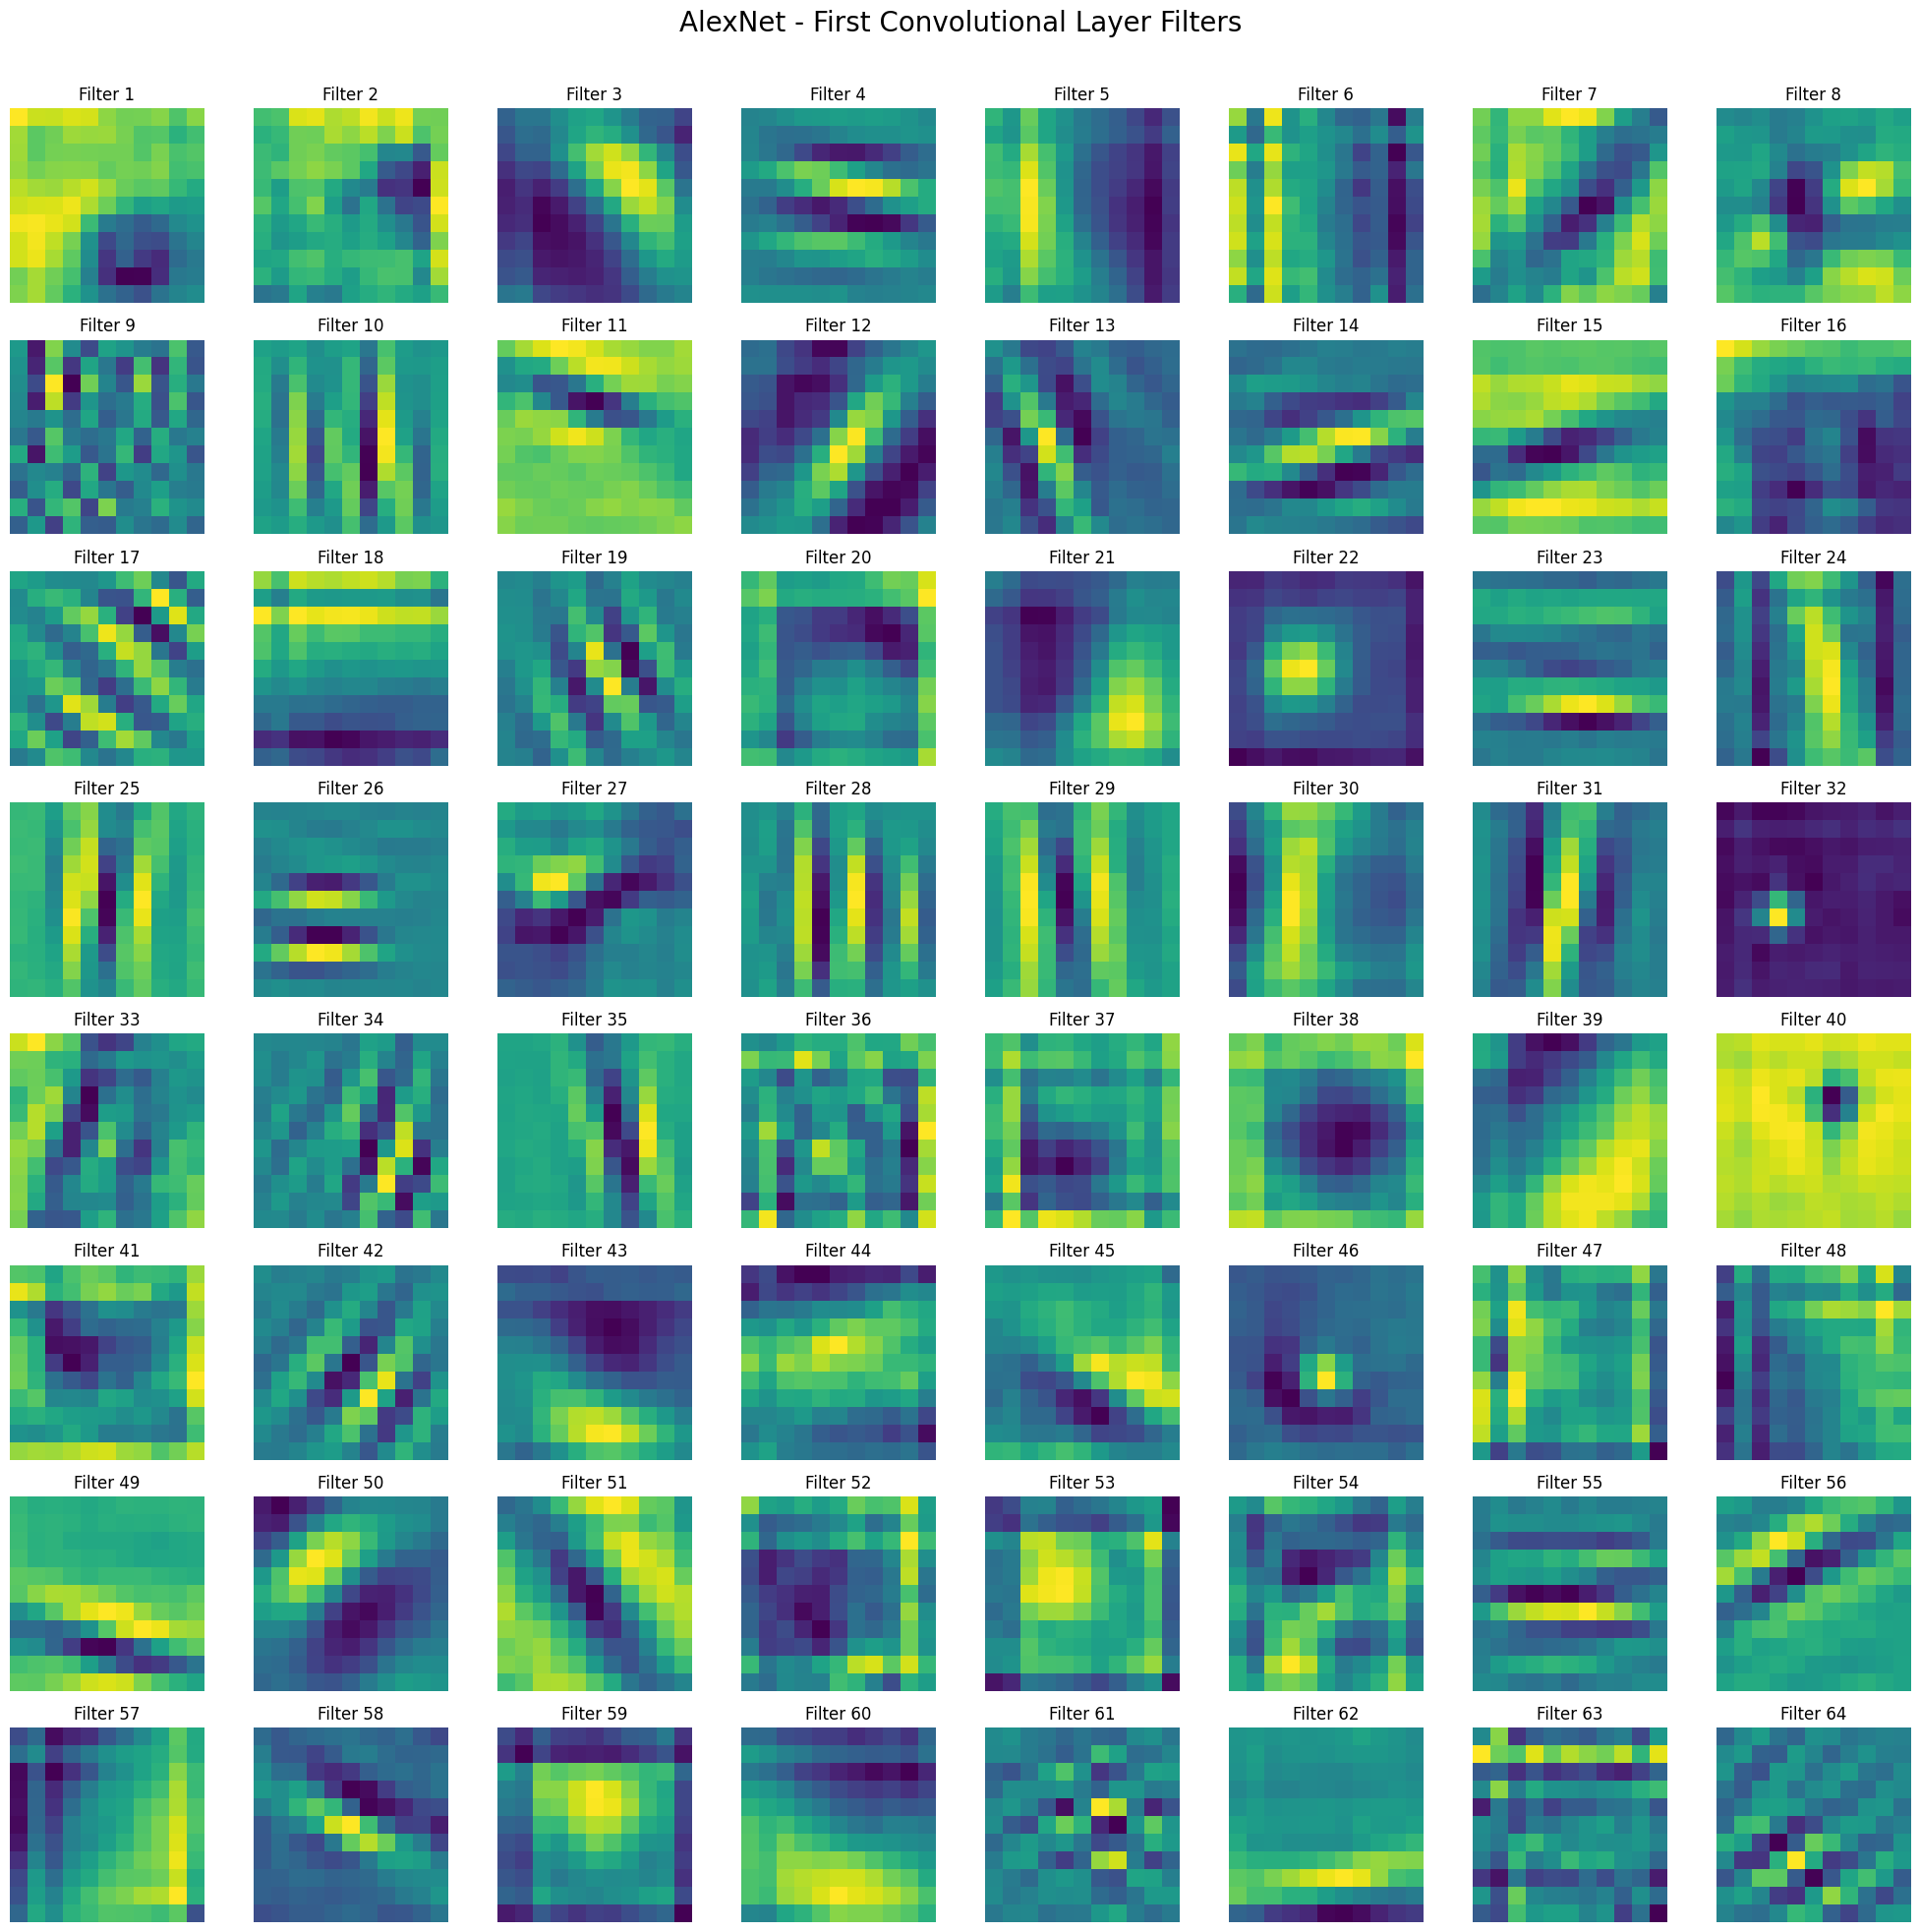

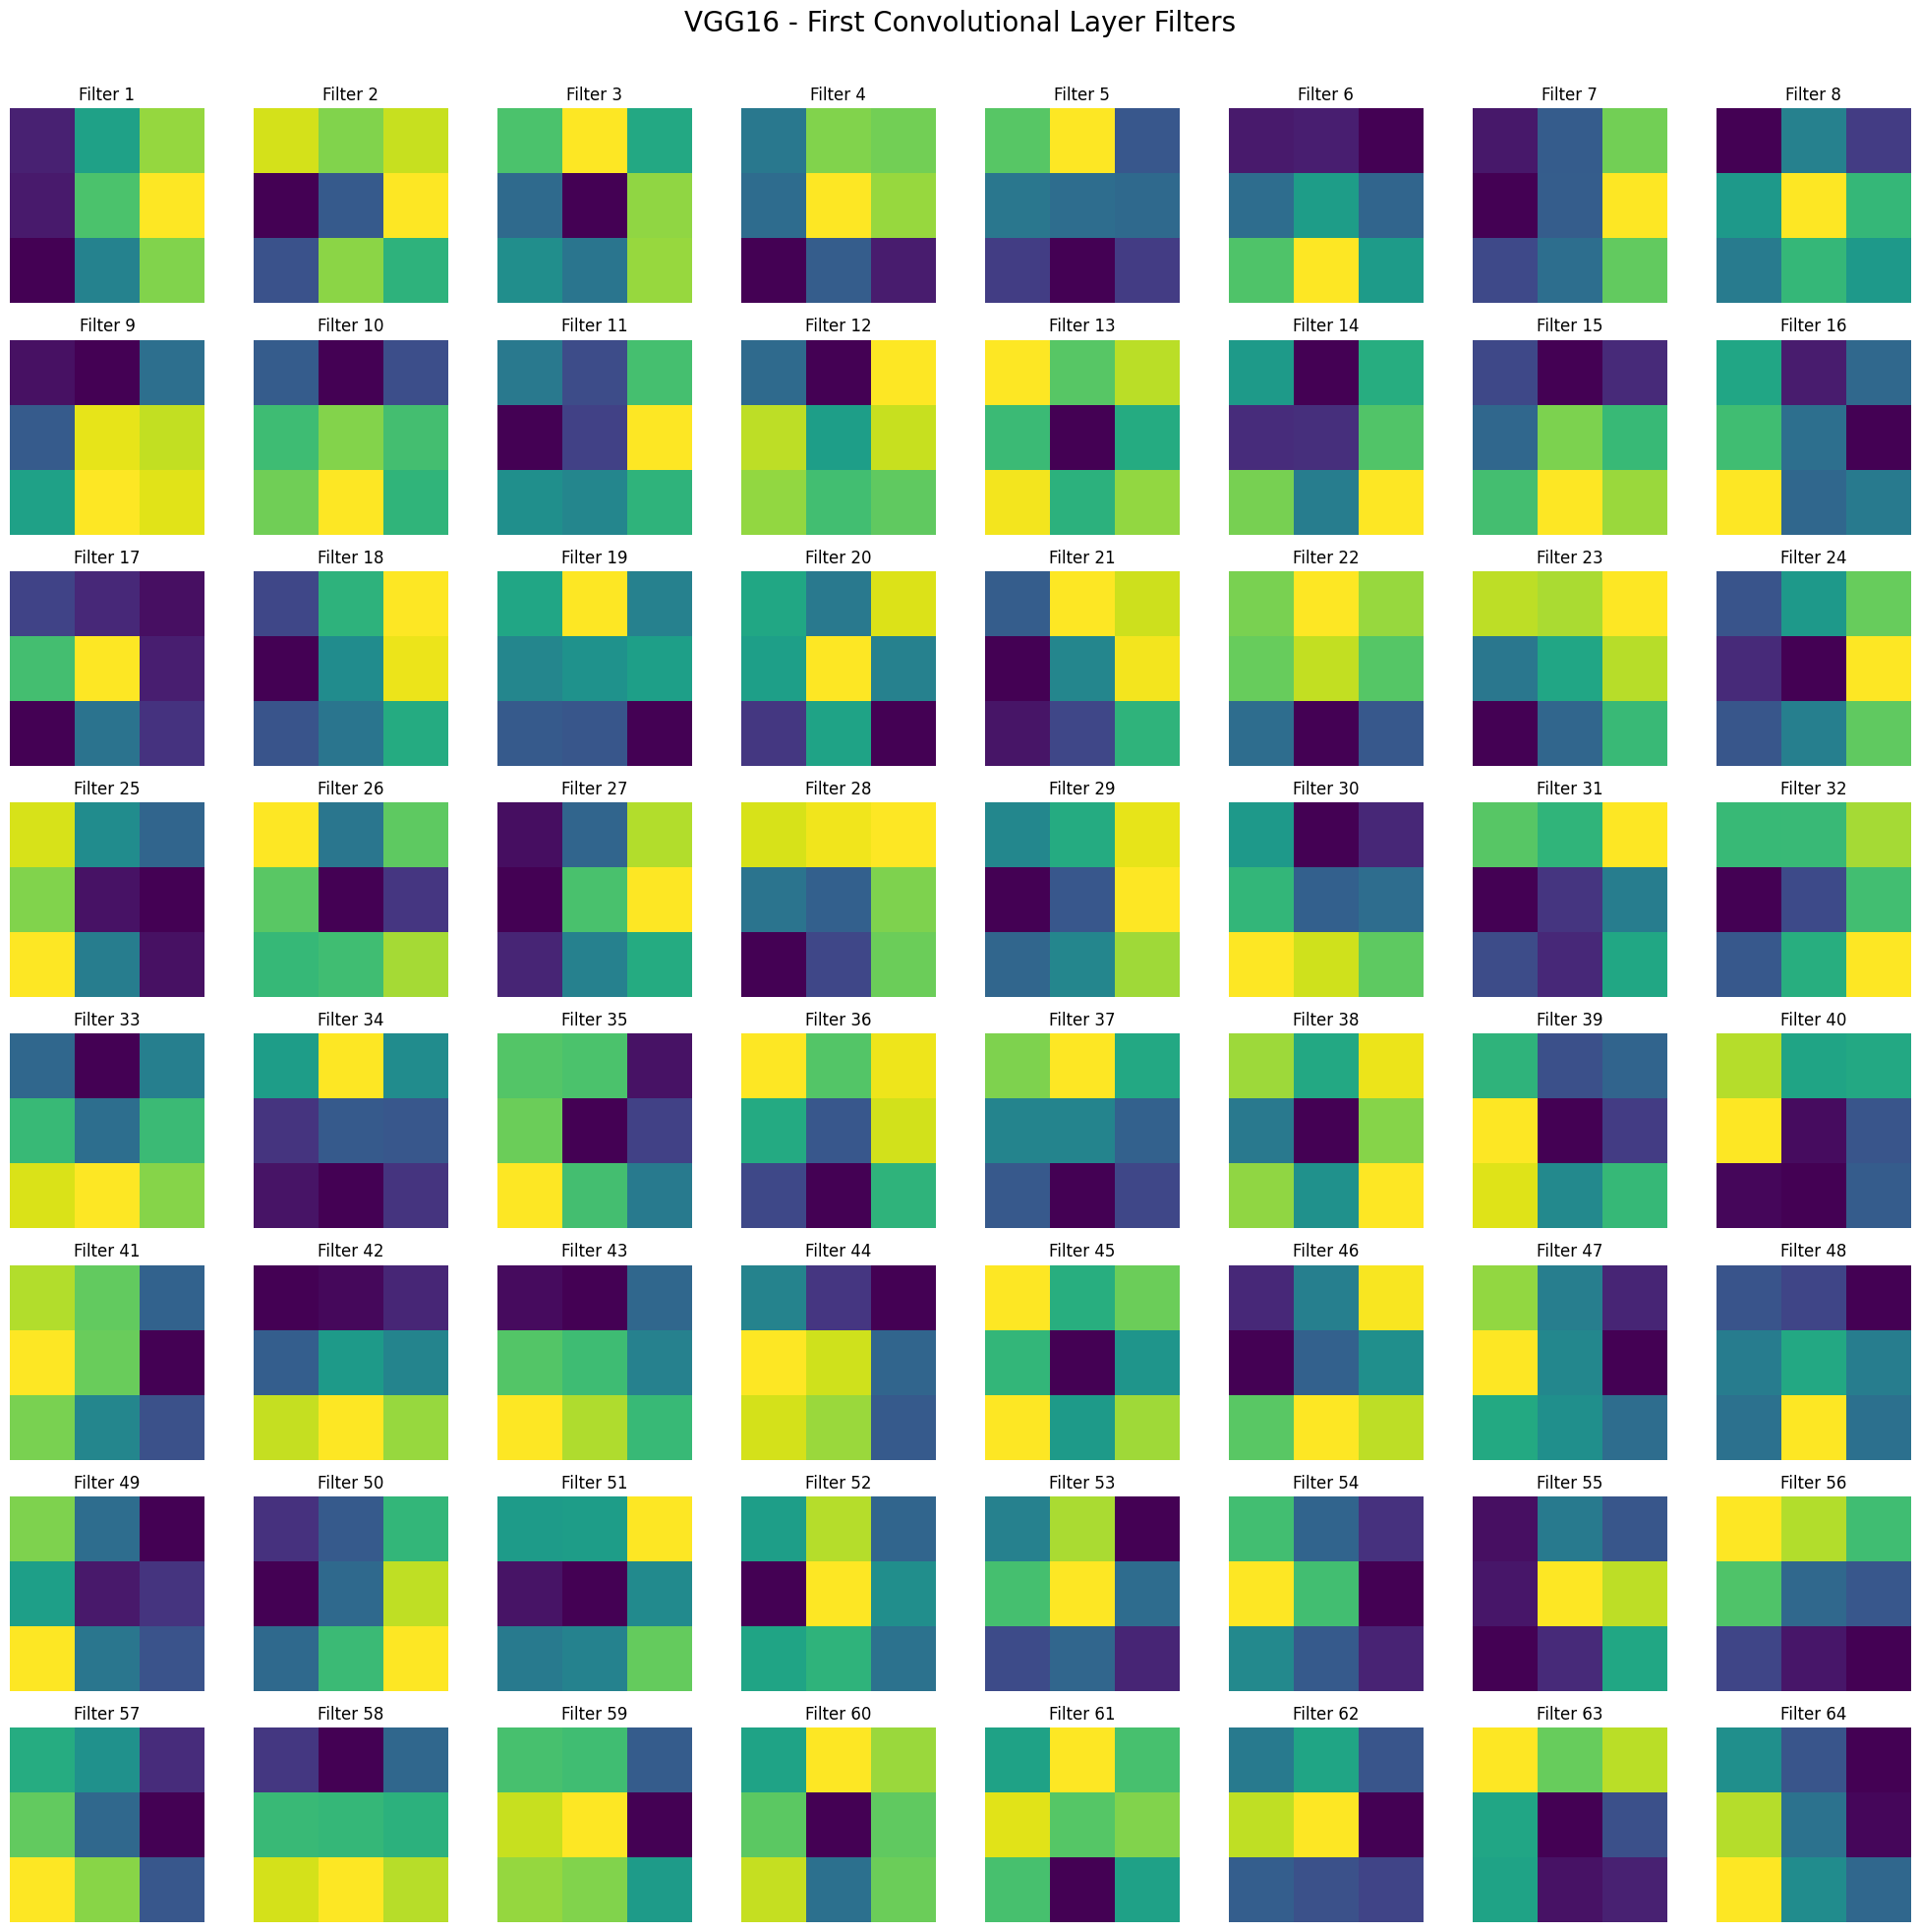

In [17]:
#Visualize feature maps or filters learned by early layers. 
MODEL_DIR = os.path.join(os.getcwd(), 'models')

# Create model architectures
import torchvision.models as models
from torch import nn
# Create AlexNet
alexnet_model = models.alexnet()
# Adjust the classifier for 10 classes
alexnet_model.classifier[1] = nn.Linear(9216,4096)
alexnet_model.classifier[4] = nn.Linear(4096,512)
alexnet_model.classifier[6] = nn.Linear(512,10)

# Create VGG16
vgg16_model = models.vgg16()
# Adjust the classifier for 10 classes
vgg16_model.classifier[3] = nn.Linear(4096,512)
vgg16_model.classifier[6] = nn.Linear(512,10)

# Load the state dictionaries
alexnet_state_dict = torch.load(os.path.join(MODEL_DIR, 'alexnet_cifar10.pth'))
vgg16_state_dict = torch.load(os.path.join(MODEL_DIR, 'vgg_cifar10.pth'))

# Load the state dictionaries into the models
alexnet_model.load_state_dict(alexnet_state_dict)
vgg16_model.load_state_dict(vgg16_state_dict)

# Get the first convolutional layer of each model
alexnet_conv1 = alexnet_model.features[0]
vgg16_conv1 = vgg16_model.features[0]

# Function to visualize filters
def visualize_filters(conv_layer, model_name):
    filters = conv_layer.weight.data.cpu().numpy()
    num_filters = filters.shape[0]
    
    # Determine grid size for better visualization
    grid_size = int(np.ceil(np.sqrt(num_filters)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))
    
    # Flatten axes array for easy indexing
    axes = axes.flatten()
    
    # Plot each filter
    for i in range(num_filters):
        # Normalize filter for better visibility
        f = filters[i][0]
        f = (f - f.min()) / (f.max() - f.min() + 1e-8)  # Normalize to [0,1] range
        axes[i].imshow(f, cmap='viridis')
        axes[i].set_title(f'Filter {i+1}')
        axes[i].axis('off')
    
    # Hide empty subplots
    for i in range(num_filters, len(axes)):
        axes[i].axis('off')
        
    plt.suptitle(f'{model_name} - First Convolutional Layer Filters', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make room for the title
    plt.savefig(os.path.join(RESULTS_DIR, f'{model_name}_filters.png'), bbox_inches='tight', dpi=300)
    plt.show()

# Visualize filters for both models
visualize_filters(alexnet_conv1, 'AlexNet')
visualize_filters(vgg16_conv1, 'VGG16')


